This is the dataset to predict the brain weight of a human being which is the impression of the head size of the humans.

The first step is to load the neccessary libraries 

In [119]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import os


In [120]:
 
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [121]:
#loading the dataset
df=pd.read_csv('headbrain.csv')

In [122]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


Now doing the Exploratory Data Analysis to see the insights of data

In [123]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [124]:
df.shape

(237, 4)

In [125]:
df.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [126]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [127]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [128]:
df.info

<bound method DataFrame.info of      Gender  AgeRange  HeadSize  BrainWeight
0         1         1      4512         1530
1         1         1      3738         1297
2         1         1      4261         1335
3         1         1      3777         1282
4         1         1      4177         1590
..      ...       ...       ...          ...
232       2         2      3214         1110
233       2         2      3394         1215
234       2         2      3233         1104
235       2         2      3352         1170
236       2         2      3391         1120

[237 rows x 4 columns]>

In [129]:
#checking for null values
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

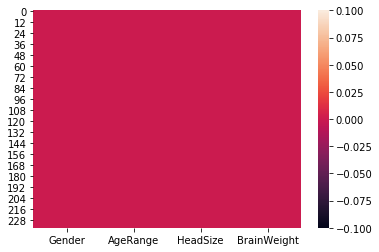

In [130]:
#checking for null values using heatmap
sns.heatmap(df.isnull())

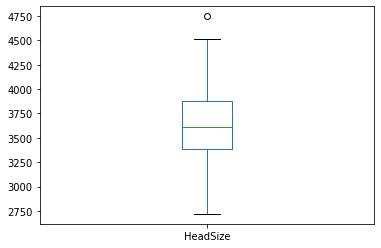

In [131]:
df['HeadSize'].plot.box()

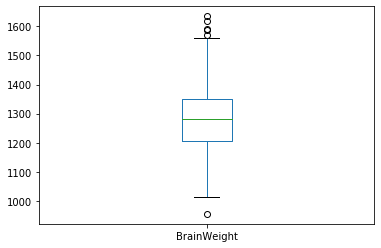

In [132]:
df['BrainWeight'].plot.box()

In [133]:
df.nunique()

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64

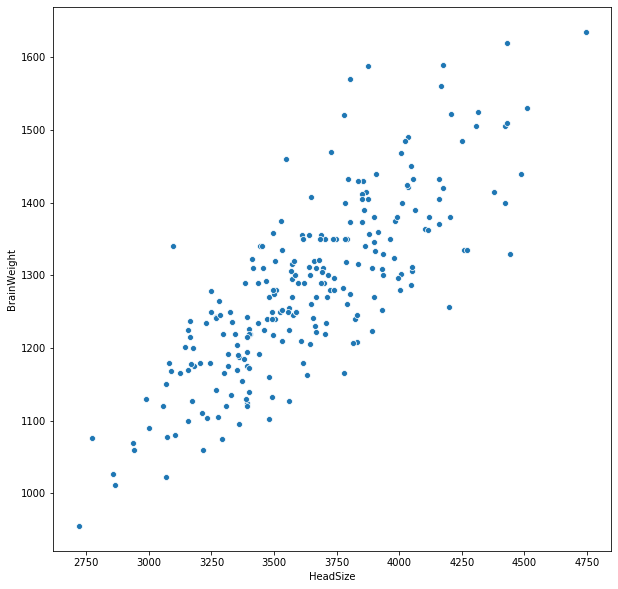

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='BrainWeight',x='HeadSize',data=df)
plt.show()

We have to find the brain weight(dependent variable= y) according to the size of head ie Headsize(independent variable= x) 

In [135]:
df  = df.values

X = df[:,2]
Y= df[:,3]

X.shape,Y.shape

((237,), (237,))

In [136]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

In [137]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

slope =  0.26116918485629514
intercept =  331.49663398311714
R-squared : 0.6330685906258329


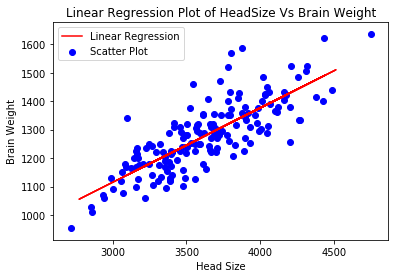

In [138]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()

In [139]:
#Reshape the input data into 2D array
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.5785884313469973


In [140]:
reg.score(X,Y)

0.6386232234474998

classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]    

In [152]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, y_train, cv=3)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  1.818 % std:  0.022 %
Decision Tree Classifier  mean accuracy:  1.818 % std:  0.022 %
SVM classifier with RBF kernel  mean accuracy:  4.242 % std:  0.007 %
SVM classifier with linear kernel  mean accuracy:  4.848 % std:  0.118 %
Gaussian Naive Bayes  mean accuracy:  4.242 % std:  0.029 %


In [156]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.013888888888888888

In [157]:
clf.feature_importances_

array([1.])

In [159]:
clf = ensemble.GradientBoostingregressor()
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.013888888888888888

In [165]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=65)
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.013888888888888888

In [166]:
clf = ensemble.GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.013888888888888888

By appling all the regression algorithms the result is almost the same. The best result is given by the linear regression model

In [168]:
# Now saving the model using joblib
from sklearn.externals import joblib
# save the model using pickle in a file
joblib.dump(reg,'reg_headbrain.pkl')

['reg_headbrain.pkl']